In [45]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import thinkstats2
import thinkplot
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, mean_squared_error, confusion_matrix
from sklearn.model_selection import train_test_split

# Assignment 4 - Classification

For this assignment, you'll need to perform a classification on a dataset, as well as do some prep work on the data. 

The exact steps of what you need to do are flexible and up to you to some degree, however you should consider some of the important things we've mentioned recently, such as:
<ul>
<li> Is the target balanced?
<li> Are there missing or erroneous values?
<li> Are there categorical or numerical features?
<li> Is there colinearity?
<li> Are there outliers?
<li> Should we normalize? 
<li> Do the distributions of the features give any indication that some may need work? 
</ul>

Basically, the data is in the original, potentially dirty, format, and you need to find what should be cleaned, and do the cleaning. There is not one "right" answer to what has to be done, and you'll probably need to do it with at least something of an iterative process - find an issue, correct it, check the data, repeat.

<b>The target that we are predicting is the loan_status. </b>

## Grading

The grades will be broken down as follows:
<ul>
<li> <b>30%</b> - a working predictive model with a reasonable level of accuracy. 
    <ul>
    <li> For the accuracy part, it will not be explicitly graded, but compared to all the others. If you're in the same general range, that's good - if yours is drastically less accurate (or, I guess more accurate), then I'll adjust. There won't be a comparison of "this person is 72.3% and this person is only 71.8% accurate, they fail."
    <li> This data is larger than most of the small sample sets, so random variations due to train-test splits shouldn't be too bad. (If you're a keener you could loop)
    <li> I will use the F1 score as the accuracy metric. 
    </ul>
<li> <b>40%</b> - a clear and readable description of what steps you took to prepare the data, and a brief not on the rationale behind it. Did you do a log transformation to a skewed feature, did you remove outliers, did you remove a feature that has a lot of missing values? Please put this somewhere obvious and readable, consider the goal of the assignment to explain your process to me. 
    <ul>
    <li> E.g. "The target data was imbalanced, so I tried several resampling methods and chose the one with the highest accuracy of the resulting model", "the feature X had the same value for 95% of records, so I dropped it". 
    <li> In this, please also state if you see a group that appears to be a good credit risk, and a group that is a bad credit risk, and indicate the evidence showing that. Please do this other than the most simplistic way - more money = better credit. If there are no such groups, state why you think this. This will likely be about 3 - 5 statements or points, you should provide evidence from the data, but it does not need to be an essay. (You may want to consider this question after you're pretty much done with the data prep and modelling.)
    </ul>
<li> <b>30%</b> - allowing your model to be "deployed". At the bottom of this file there is a small block of code to load in some test data (that I have), and calculate your accuracy. Your contribution to this part is to have a model that is ready to make predictions. Some specifics to consider:
    <ul>
    <li> The test data will be in exactly the same format as the dataset you're given. So any steps that you took to prepare your data for modelling will need to be mirroed here, so the new  data can be predicted. The easiest way to do this is to use a pipeline, but it is up to you. Remember the model only accepts data that is in a certain format - the one that you had the data in when it was trained, so when making predictions you need to make sure that is true. 
    <li> Since I'm providing test data, and your task is to just create a model, think about how that might impact your train-test splitting, both as you're developing and for the final product. 
    <li> Once the model is trained it should predict any data that is in the right format, so I should be able to provide any proper dataset, click run on that testing cell, and get predictions. I will not be doing anything that will purposefully make this harder or trickier, like including data that has errors or is in the wrong format, I just split the entire set of data, reserved part of it to test accuracy, and gave the rest to you. Things that you've changed (e.g. dropping a column, one-hot encoding) do need to be replicated at some point before the model can accept the new data to predict. In general we <b>do</b> want to check in our processing that our input is valid, this is kind of a junior introduction to that. 
    </ul>
</ul

## Load Credit Data

In [46]:
df = pd.read_csv("train.csv")
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


### Accuracy Test

Replace the green part with whatever you need to transform the fresh data into the format needed for your model to predict. 

<b>Note:</b> you could test and make sure that things are working OK here by taking part of your dataset, saving it in a separate CSV, and running it through here as a piece of test data. The accuracy results would be useless, but you'd confirm that the model works properly. 

In [47]:
#Get some info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26064 entries, 0 to 26063
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  26064 non-null  int64  
 1   person_age                  26064 non-null  int64  
 2   person_income               26064 non-null  int64  
 3   person_home_ownership       26064 non-null  object 
 4   person_emp_length           25350 non-null  float64
 5   loan_intent                 26064 non-null  object 
 6   loan_grade                  26064 non-null  object 
 7   loan_amnt                   26064 non-null  int64  
 8   loan_int_rate               23575 non-null  float64
 9   loan_status                 26064 non-null  int64  
 10  loan_percent_income         26064 non-null  float64
 11  cb_person_default_on_file   26064 non-null  object 
 12  cb_person_cred_hist_length  26064 non-null  int64  
dtypes: float64(3), int64(6), object

In [48]:
#df = df[df["loan_status "]!="?"]

#df['person_home_ownership ']=df['person_home_ownership'].astype('category')
#df['loan_intent']=df['loan_intent'].astype('category')
#df['loan_grade ']=df['loan_grade '].astype('category')
#df['cb_person_default_on_file']=df['cb_person_default_on_file'].astype('category')
#df['loan_status']=df['loan_status'].astype('category')
#df.info()

In [49]:
df.head()

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10
1,8449,24,58000,MORTGAGE,8.0,DEBTCONSOLIDATION,A,15700,7.90,0,0.27,N,3
2,20983,30,45000,RENT,11.0,MEDICAL,C,5000,12.73,1,0.11,Y,8
3,19612,35,35000,MORTGAGE,5.0,EDUCATION,B,5600,11.49,0,0.16,N,6
4,30371,38,55000,RENT,0.0,EDUCATION,C,6500,11.03,0,0.12,Y,12


In [50]:
#df=df[df['person_emp_length']>10]
#df=df[df['person_emp_length']<20]
#df=df[df["person_age"]>30]
#df=df[df["person_age"]<40]
#df=df[df["person_income"]>100000]
#df=df[df["person_income"]<150000]
#df.describe()


In [51]:
#visualize pairplot
#sns.pairplot(df)

Collinearity between Loan_amnt and Loan_percent_income

In [52]:
df.head(1)

,Unnamed: 0,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,26967,27,120000,MORTGAGE,3.0,PERSONAL,B,14000,11.99,0,0.12,N,10


In [53]:
#Print boxplots - we'll put them in subplots to make it look fancy
#Countplots are basically categorical hists - we could've used a hist as well
#fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(20,12))
#fig.suptitle("Categorical Plotting", fontsize=20)
#sns.boxplot(x="person_home_ownership", y="loan_status", data=df,ax=ax[0,0])
#sns.boxplot(x="loan_intent", y="loan_status", data=df,ax=ax[0,1])
#sns.countplot(x="person_home_ownership", data=df,ax=ax[1,0])
#sns.countplot(x="loan_intent", data=df,ax=ax[1,1])

In [54]:
## Correlation Matrix
corr = df.corr()
corr.style.background_gradient()
corr.style.background_gradient().set_precision(2)

C:\Users\shikh\AppData\Local\Temp\ipykernel_27540\527883699.py:4: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  corr.style.background_gradient().set_precision(2)


,Unnamed: 0,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
Unnamed: 0,1.00,0.73,0.17,0.19,0.10,-0.00,-0.06,-0.07,0.77
person_age,0.73,1.00,0.18,0.16,0.05,0.00,-0.02,-0.05,0.85
person_income,0.17,0.18,1.00,0.13,0.27,-0.00,-0.14,-0.25,0.11
person_emp_length,0.19,0.16,0.13,1.00,0.11,-0.05,-0.08,-0.06,0.14
loan_amnt,0.10,0.05,0.27,0.11,1.00,0.15,0.11,0.57,0.04
loan_int_rate,-0.00,0.00,-0.00,-0.05,0.15,1.00,0.34,0.12,0.01
loan_status,-0.06,-0.02,-0.14,-0.08,0.11,0.34,1.00,0.38,-0.02
loan_percent_income,-0.07,-0.05,-0.25,-0.06,0.57,0.12,0.38,1.00,-0.04
cb_person_cred_hist_length,0.77,0.85,0.11,0.14,0.04,0.01,-0.02,-0.04,1.00


loan_percent_income and loan_amnt have high correlation

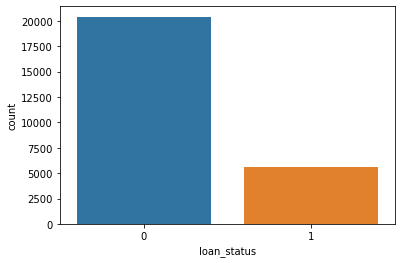

In [55]:
sns.countplot(x = "loan_status", data = df)
plt.show()

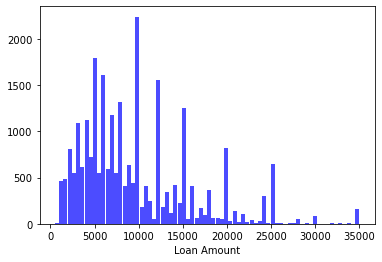

In [56]:
#Distribution of Loan Amounts

n, bins, patches = plt.hist(x = df["loan_amnt"], bins = "auto", color = "blue", alpha = 0.7, rwidth = 0.95)
plt.xlabel("Loan Amount")
plt.show()

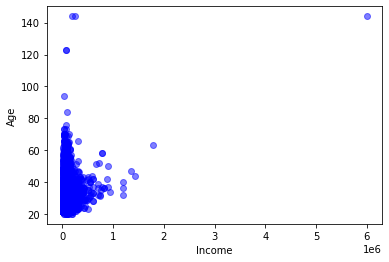

In [57]:
#Scatter plot of Income Against Age
plt.scatter(df["person_income"], df["person_age"], c = "blue", alpha = 0.5)
plt.xlabel("Income")
plt.ylabel("Age")
plt.show()

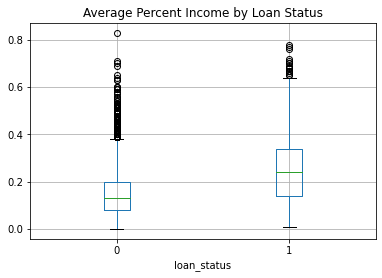

In [58]:
#Box plot of the percentage income by loan status
df.boxplot(column = ['loan_percent_income'], by = 'loan_status')
plt.title('Average Percent Income by Loan Status')
plt.suptitle('')
plt.show()


Gathering the variables according to their data type.

In [59]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtypes == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtypes != "O"]
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtypes == "O"]

    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # num_cols
    num_cols = [col for col in dataframe.columns if dataframe[col].dtypes != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f'cat_cols: {len(cat_cols)}')
    print(f'num_cols: {len(num_cols)}')
    print(f'cat_but_car: {len(cat_but_car)}')
    print(f'num_but_cat: {len(num_but_cat)}')
    return cat_cols, num_cols, cat_but_car,num_but_cat
cat_cols, num_cols, cat_but_car,num_but_cat =grab_col_names(df)

Observations: 26064
Variables: 13
cat_cols: 5
num_cols: 8
cat_but_car: 0
num_but_cat: 1


In [60]:
num_but_cat
#Its the dependent variable 

['loan_status']

In [65]:

cat_cols


['person_home_ownership',
 'loan_intent',
 'loan_grade',
 'cb_person_default_on_file',
 'loan_status']

From above it is clear that there are five categorical variables

In [62]:
num_cols

['Unnamed: 0',
 'person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

From above it is clear that there are 7 numerical variables.

In [66]:
#Grouping the mean of the numerical variables according to the credit default

def target_summary_with_num(dataframe, target, numerical_col):
    print(dataframe.groupby(target).agg({numerical_col: "mean"}), end="\n\n\n")
for col in num_cols:
    target_summary_with_num(df, "loan_status",col)

               Unnamed: 0
loan_status              
0            16621.485083
1            15173.174305


             person_age
loan_status            
0             27.818351
1             27.449478


             person_income
loan_status               
0             70688.031157
1             49194.426827


             person_emp_length
loan_status                   
0                     4.967165
1                     4.147091


                loan_amnt
loan_status              
0             9245.004409
1            10863.369315


             loan_int_rate
loan_status               
0                10.426765
1                13.083184


             loan_percent_income
loan_status                     
0                       0.148942
1                       0.247282


             cb_person_cred_hist_length
loan_status                            
0                              5.844560
1                              5.663068




Outliers:

In [69]:
#Defining outliers
def outlier_thresholds(dataframe, col_name, q1=0.01, q3=0.99):
    quartile1 = dataframe[col_name].quantile(q1)
    quartile3 = dataframe[col_name].quantile(q3)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

def check_outlier(dataframe, col_name):
    low_limit, up_limit = outlier_thresholds(dataframe, col_name)
    if dataframe[(dataframe[col_name] > up_limit) | (dataframe[col_name] < low_limit)].any(axis=None):
        return True
    else:
        return False

for col in num_cols:
    print(col, check_outlier(df, col))
#person_age, person_income and person_emp_lenght have some outlier observations

Unnamed: 0 False
person_age True
person_income True
person_emp_length True
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


In [70]:
outlier_thresholds(df, num_cols)

(Unnamed: 0                    -47590.480
 person_age                       -22.500
 person_income                -301500.000
 person_emp_length                -25.500
 loan_amnt                     -41925.000
 loan_int_rate                    -14.245
 loan_percent_income               -0.685
 cb_person_cred_hist_length       -20.500
 dtype: float64,
 Unnamed: 0                     80164.480
 person_age                        93.500
 person_income                 540900.000
 person_emp_length                 42.500
 loan_amnt                      72675.000
 loan_int_rate                     38.195
 loan_percent_income                1.195
 cb_person_cred_hist_length        39.500
 dtype: float64)

In [71]:
df[df["person_age"] > 93].index

Int64Index([928, 10597, 12262, 12993, 17562, 23601], dtype='int64')

In [73]:
#Replacing Outliers

def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

for col in num_cols:
    replace_with_thresholds(df, col)

#Check
for col in num_cols:
    print(col, check_outlier(df, col))

Unnamed: 0 False
person_age False
person_income False
person_emp_length False
loan_amnt False
loan_int_rate False
loan_percent_income False
cb_person_cred_hist_length False


Missing values:

In [74]:
df.isnull().sum()

Unnamed: 0                       0
person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              714
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 2489
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [77]:
(714 + 2489) / len(df)
# We have null values in 2 numeric variabels and they are 12% percent of our dataset.
# We need to fill them because we can't lose 12%  of the   data.
# We can fill them with median, mean and KNN Imputer. Fill them with median.

0.12288980969920196

Checking for any missing values:

In [78]:
df["person_emp_length"].fillna((df["person_emp_length"].median()), inplace = True)
df["loan_int_rate"].fillna((df["loan_int_rate"].mean()), inplace = True)
#check
df["loan_int_rate"].isnull().sum()


0

Above shows that Now there are no missing values in our data.

Rare Analysing & One-Hot Encoding
 With one-hot, we convert each categorical value into a new categorical column 

In [79]:
def rare_analyser(dataframe, target, cat_cols):
    for col in cat_cols:
        print(col, ":", len(dataframe[col].value_counts()))
        print(pd.DataFrame({"COUNT": dataframe[col].value_counts(),
                            "RATIO": dataframe[col].value_counts() / len(dataframe),
                            "TARGET_MEAN": dataframe.groupby(col)[target].mean()}), end="\n\n\n")
rare_analyser(df, "loan_status", cat_cols)

#One Hot Encoding
def one_hot_encoder(dataframe, categorical_cols, drop_first=False):
    dataframe = pd.get_dummies(dataframe, columns=categorical_cols, drop_first=drop_first)
    return dataframe
ohe_cols = [col for col in df.columns if 10 >= df[col].nunique() >= 2 and col not in "loan_status"]
credit_new2 = one_hot_encoder(df, ohe_cols,drop_first=True)

credit_new2.columns

person_home_ownership : 4
          COUNT     RATIO  TARGET_MEAN
MORTGAGE  10803  0.414480     0.123392
OTHER        87  0.003338     0.321839
OWN        2056  0.078883     0.073930
RENT      13118  0.503300     0.315444


loan_intent : 6
                   COUNT     RATIO  TARGET_MEAN
DEBTCONSOLIDATION   4134  0.158610     0.279632
EDUCATION           5119  0.196401     0.172885
HOMEIMPROVEMENT     2940  0.112799     0.262585
MEDICAL             4885  0.187423     0.263664
PERSONAL            4390  0.168432     0.199772
VENTURE             4596  0.176335     0.146432


loan_grade : 7
   COUNT     RATIO  TARGET_MEAN
A   8627  0.330993     0.098412
B   8357  0.320634     0.161900
C   5173  0.198473     0.204910
D   2884  0.110651     0.588419
E    771  0.029581     0.647211
F    193  0.007405     0.699482
G     59  0.002264     0.983051


cb_person_default_on_file : 2
   COUNT     RATIO  TARGET_MEAN
N  21425  0.822015     0.182124
Y   4639  0.177985     0.377021


loan_status : 2
   COU

Index(['Unnamed: 0', 'person_age', 'person_income', 'person_emp_length',
       'loan_amnt', 'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_OTHER',
       'person_home_ownership_OWN', 'person_home_ownership_RENT',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_B', 'loan_grade_C', 'loan_grade_D', 'loan_grade_E',
       'loan_grade_F', 'loan_grade_G', 'cb_person_default_on_file_Y'],
      dtype='object')

Creating the Model
Logistic Regression

In [80]:
#Multivariate Logistic Regression

y = credit_new2["loan_status"]
X = credit_new2.drop(["loan_status"], axis=1)

#Model
logit = LogisticRegression().fit(X,y)

In [81]:
logit.coef_

array([[ 2.70814304e-05, -9.17679858e-02, -3.91161759e-05,
        -5.70092915e-02,  1.02388719e-04,  1.89939436e-01,
         1.41971156e-03,  1.16620764e-02,  2.02475003e-04,
        -1.12880993e-02,  2.18010815e-02, -8.52509822e-03,
         5.51967084e-03,  3.49589785e-03, -2.92782667e-03,
        -1.03447658e-02, -1.63035557e-02, -4.76267305e-03,
         2.74564361e-02,  8.45272609e-03,  2.37897136e-03,
         1.18550448e-03,  1.77060032e-02]])

In [82]:
#Predictions
y_pred = logit.predict(X)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

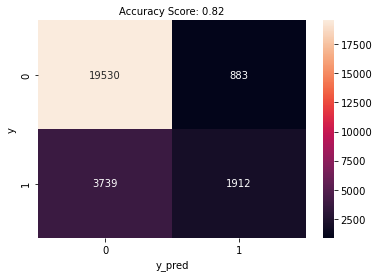

In [83]:
# Confusion Matrix
def plot_confusion_matrix(y, y_pred):
    acc = round(accuracy_score(y, y_pred), 2)
    cm = confusion_matrix(y, y_pred)
    sns.heatmap(cm, annot=True, fmt=".0f")
    plt.xlabel('y_pred')
    plt.ylabel('y')
    plt.title('Accuracy Score: {0}'.format(acc), size=10)
    plt.show()

plot_confusion_matrix(y, y_pred)

In [84]:
#Model Validation: Holdout
#Splitting the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = 112224)

In [88]:
from sklearn.metrics import classification_report

In [89]:
#Building Model with Train Set
logit_model = LogisticRegression().fit(X_train, y_train)

#Predicting the test set
y_pred = logit_model.predict(X_test)

#For AUC Score(Prob of Being Default)
y_prob = logit_model.predict_proba(X_test)[:, 1]



#Classification Report
print(classification_report(y_test, y_pred))


#F-1 score is very low.

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      4052
           1       0.67      0.35      0.46      1161

    accuracy                           0.82      5213
   macro avg       0.75      0.65      0.68      5213
weighted avg       0.80      0.82      0.79      5213



#F-1 score is very low.

In [90]:
import matplotlib.pyplot as plt
from sklearn import datasets, metrics, model_selection, svm

c:\Users\shikh\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


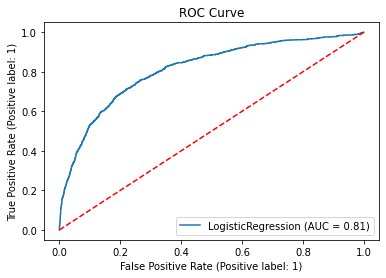

0.8127867013918118

In [91]:
#ROC Curve & ROC AUC Score

# ROC Curve
plot_roc_curve(logit_model, X_test, y_test)
plt.title('ROC Curve')
plt.plot([0, 1], [0, 1], 'r--')
plt.show()

roc_auc_score(y_test, y_prob)

In [92]:
#Model Validation: 5-Fold Cross Validation

y = credit_new2["loan_status"]
X = credit_new2.drop(["loan_status"], axis=1)

#Model
logit = LogisticRegression().fit(X,y)

In [94]:
from sklearn import datasets, linear_model
from sklearn.model_selection import cross_val_score

In [95]:
cv_logit_acc = cross_val_score(logit, X,y,cv = 10, scoring = "accuracy")
cv_logit_f1 = cross_val_score(logit, X,y,cv = 10, scoring = "f1")
cv_logit_roc = cross_val_score(logit, X,y,cv = 10, scoring = "roc_auc")

In [96]:
print("Accuracy: ",cv_logit_acc.mean())
print(" F-1 Score: ",cv_logit_f1.mean())
print("ROC AUC Score: ",cv_logit_roc.mean())

Accuracy:  0.8144185131182031
 F-1 Score:  0.3563986279288102
ROC AUC Score:  0.7814927909043249


In [63]:
#d_test = pd.read_csv("test.csv")

######################
# Insert whatever you need to do to prep the data here. 
# It might be nothing if you have a big pipeline. 
# Ensure that at the end your data is in two arrays - xtest and ytest
# Ensure the name of your final model is "model"
# Each should contain the ENTIRE x or y dataset in the test data. 
#
# This part should be reusable - any dataset in this format should just run
# and generate predictions and accuracy stats. 
# Please DO NOT do any train-test splitting here. 
#######################

# This should work once you're done, as is. 
# uncomment the stuff below when ready to run.
#print("F1:",f1_score(ytest, prediction_labels))
#conf_matrix = confusion_matrix(ytest, prediction_labels)
#sns.heatmap(conf_matrix, annot=True)